In [21]:
import matplotlib.pyplot as plt; import numpy as np; import pandas as pd
from IPython import display
import seaborn as sns
from ContributorCentricFunctions import *
from scipy import stats
%matplotlib inline

In [2]:
years = [2005+i for i in range(12)]
years

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [3]:
study_tiles = json.loads(open('study_tiles_with_compare_tiles.json','r').read())
print("Found {0} tiles.".format(len(study_tiles)))

Found 7 tiles.


# Study Tiles: Load data for a specific study tile

In [4]:
for idx, tile in enumerate(study_tiles):
    print(idx, tile['name'])

0 Port Au Prince, Haiti
1 Tacloban, Philippines
2 Monrovia, Liberia
3 Trisuli Bazar, Nepal
4 Heidelberg, Germany
5 London, UK
6 Manhattan, NY


## 1. Get the `user_list` by setting the `study_tile_idx` to the appropriate study tile

In [5]:
study_tile_idx = 4

In [6]:
reset() #Safety for the db connections
study_tiles[study_tile_idx]['user_list'] = get_all_users_who_edited_tile(study_tiles[study_tile_idx])

2005 . 2006 . 2007 . 2008 . 2009 . 2010 . 2011 . 2012 . 2013 . 2014 . 2015 . 2016 . 

In [7]:
print("Found: {0} users".format(len(study_tiles[study_tile_idx]['user_list'])))

Found: 874 users


## 2. Build the User Distributions
If this doesn't run, run the cell 2 above again)

In [8]:
study_tiles[study_tile_idx]['users'] = build_user_distributions(study_tiles[study_tile_idx]['user_list'])
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['df'].head(2))

 3916/ ~ 4195

,quadkey,year,uid,buildings,road_km,amenities,edits,num_days,user_stats_uid,user_name,total_year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
0,120032112000,2005,0,0,0.0,0,11,2,0,,2005,0,0.0,0,294,22
1,120032111022,2005,0,0,0.0,0,2,1,0,,2005,0,0.0,0,294,22


## 3. Get tile focus for each user

In [9]:
process_dictionary_of_users(study_tiles[study_tile_idx]['users'])
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['tiles'].head(2))
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['annual'].head(2))

 874/874

,amenities,road_km,buildings,num_days,edits,percent_user_road_km,percent_user_buildings,percent_user_amenities,percent_user_edits
quadkey,,,,,,,,,
003133200112,0,0.087734,0,2,18,0.000453,0.0,0.0,0.003552
003133200113,0,8.736630,0,2,520,0.045082,0.0,0.0,0.102604


,uid,user_name,year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
0,0,,2005,0,0.000,0,294,22
1,0,,2006,0,378.848,134,225048,189


## 3.5 Get Study Tile Focus

In [10]:
process_dictionary_of_users_for_study_tile_stats(study_tiles[study_tile_idx]['users'], study_tiles[study_tile_idx]['quad'])
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['toi'].head(2))

 855/874

,quadkey,year,uid,buildings,road_km,amenities,edits,num_days,user_stats_uid,user_name,total_year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
5495,120203320232,2007,0,0,0.838542,0,57,2,0,,2007,135,13542.6,911,198656,329


## 4. Who is mapping what: Build Current Tile DF

In [11]:
current_tile_df = build_all_stats_for_tile(study_tiles[study_tile_idx])
current_tile_df.head(2)

,amenities,road_km,buildings,num_days,edits,percent_user_road_km,percent_user_buildings,percent_user_amenities,percent_user_edits,uid,total_editing_days_ever,total_buildings_ever,total_road_km_ever,total_amenities_ever,total_edits_ever,percent_tile_road_km,percent_tile_buildings,percent_tile_amenities,percent_tile_edits
0,0,0.838542,0,2,57,0.004327,0.0,0.0,0.011247,0,876,1443,19379.268000,1541,506805,0.027075,0.000000,0.0,0.062003
1,0,0.087137,1,3,5,0.944977,12.5,0.0,31.250000,645123,9,8,9.221075,1,16,0.002813,0.003054,0.0,0.005439


### Processed Study tiles now have the following attributes: 

- **name**: Name of Region
- **user_list**: List of UIDs of users who have edited on this tile
- **users**: Dictionary, keyed by UID
  - `uid`:
    - **df**: Full dataframe of all edits on all tiles by this user
    - **tiles**: DataFrame of unique tiles, summed over all years
    - **annual**: DataFrame of Editing Aggregates over all tiles, per year

# Begin Analysis of Tile

In [12]:
print("Current Study Tile: {0}".format(study_tiles[study_tile_idx]['name']))
print("\tUsers: {0}".format(len(study_tiles[study_tile_idx]['user_list'])))
print("Current_tile_df size: {0} (Should match the user count)".format(len(current_tile_df)))

Current Study Tile: Heidelberg, Germany
	Users: 874
Current_tile_df size: 874 (Should match the user count)


## Percentage of a User's edits (of all time) that occur on this tile: 

# 1.  Users active on this tile overtime

In [13]:
overtime_df = get_active_users_overtime_df(study_tiles[study_tile_idx]['users'])

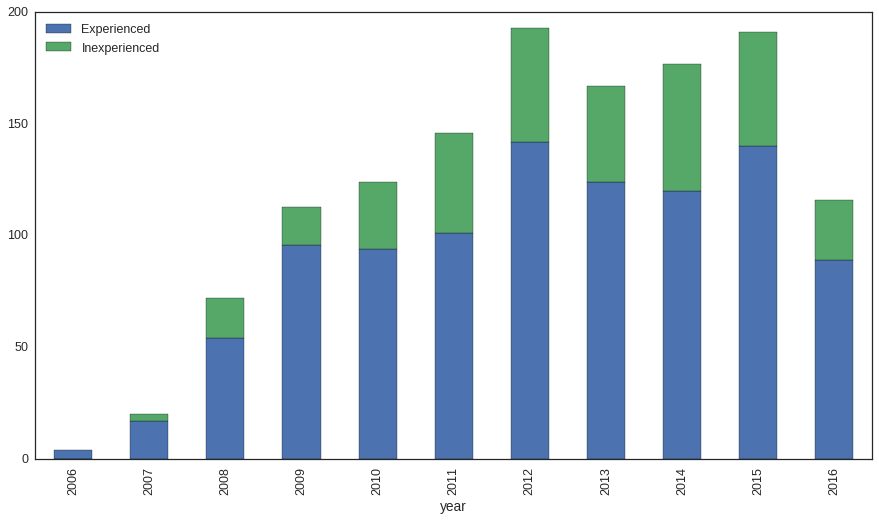

In [14]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,8), facecolor='w', edgecolor='k')

#How many days (to date) is considered experienced?
threshold = 7

gt_10 = overtime_df.query("active_days_to_date>={0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
lt_10 = overtime_df.query("active_days_to_date<{0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})

gt_10.columns = ['Experienced']
lt_10.columns = ['Inexperienced']

gt_10.join(lt_10).plot(ax=axs,kind='bar',stacked=True)

# 2: User Experience 

Who's Mapping Buildings and Roads?

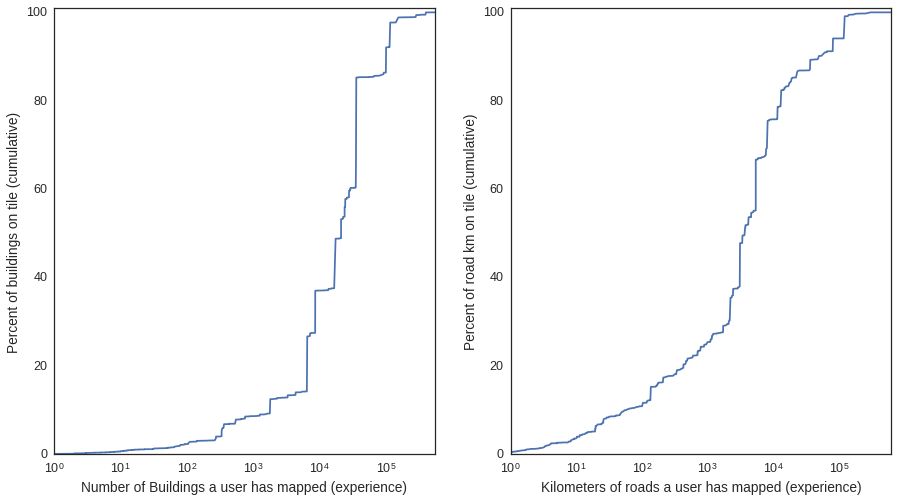

In [15]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

b_view = current_tile_df.sort_values(by='total_buildings_ever')
b_view['cumulative_percent'] = b_view.percent_tile_buildings.cumsum()

b_view.plot(ax=axs[0],x='total_buildings_ever',y='cumulative_percent', logx=True,legend=None)

axs[0].set_ylabel('Percent of buildings on tile (cumulative)')
axs[0].set_xlabel('Number of Buildings a user has mapped (experience)')


r_view = current_tile_df.sort_values(by='total_road_km_ever')
r_view['cumulative_percent'] = r_view.percent_tile_road_km.cumsum()

r_view.plot(ax=axs[1],x='total_road_km_ever',y='cumulative_percent', logx=True,legend=None)

axs[1].set_ylabel('Percent of road km on tile (cumulative)')
axs[1].set_xlabel('Kilometers of roads a user has mapped (experience)')

for ax in axs:
    ax.set_ylim(0,101)
    ax.set_xlim(1)

# 3. User Focus

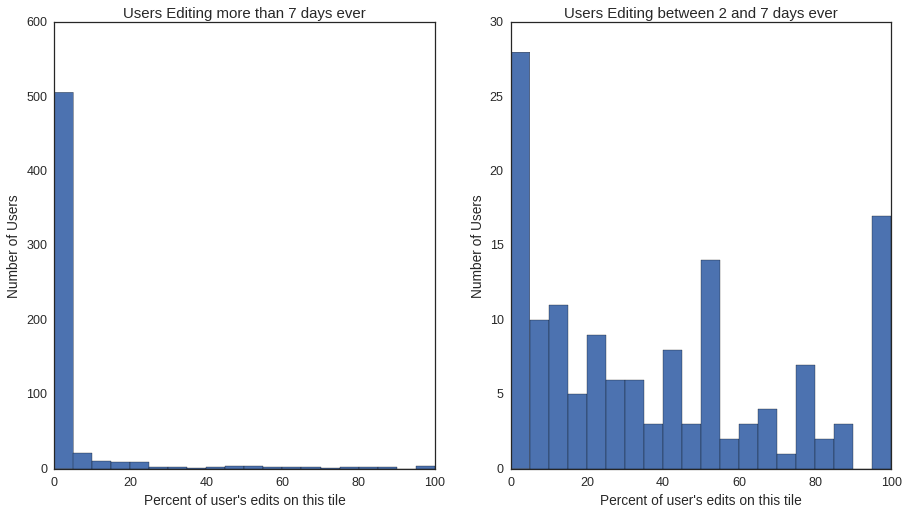

In [16]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

current_tile_df.query('total_editing_days_ever>7').query('total_editing_days_ever>1').plot(ax=axs[0], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,5))
axs[0].set_title('Users Editing more than 7 days ever')

current_tile_df.query('total_editing_days_ever<7').query('total_editing_days_ever>1').plot(ax=axs[1], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,5))
axs[1].set_title('Users Editing between 2 and 7 days ever')

for ax in axs:
    ax.set_xlabel("Percent of user's edits on this tile")
    ax.set_ylabel('Number of Users')

<br>
<hr>
<br>
<br>
# Run Tile-by-Tile Comparisons
For each study tile, we have _comparable_ tiles, these are the tiles of most interest, because the difference in patterns between these tiles and our study tiles is what makes the analysis.

#### 1. Get a _comparable_ tile

[Interestingly, ALL of the comparable tiles for Trisuli Bazar are also in Nepal](http://www.townsendjennings.com/geojson-polygons?geojson=http://epic-analytics.cs.colorado.edu:9000/jennings/iscram/Trisuli%20Bazar%2c%20Nepal_sim_tiles.geojson#7.43/27.655/84.741).

In [23]:
if 'compare_tiles' in study_tiles[study_tile_idx]:
    print("Comparable Tiles for {0}: ".format(study_tiles[study_tile_idx]['name']))
    for idx, compare in enumerate(study_tiles[study_tile_idx]['compare_tiles']):
        print("\t{0}, '{1}'".format(idx, compare['quad']))

Comparable Tiles for Heidelberg, Germany: 
	0, '120210201003'
	1, '120201330112'
	2, '120201332212'
	3, '120210232331'
	4, '120212011000'
	5, '120203101113'
	6, '120212011010'
	7, '120212011001'
	8, '120203102231'
	9, '120203030300'
	10, '120203021123'
	11, '120203030301'
	12, '120203121213'
	13, '120212021302'
	14, '120203021322'
	15, '120212033031'
	16, '120203133123'
	17, '120203033213'
	18, '120202132303'
	19, '120213212111'
	20, '120203302020'
	21, '120203213123'
	22, '120203302021'
	23, '120213313210'
	24, '120203213303'
	25, '120203320203'
	26, '120203320202'
	27, '120203233333'
	28, '120212223221'
	29, '120221101002'
	30, '120221101023'
	31, '120221101021'
	32, '120230002210'
	33, '120231002213'
	34, '120221013223'
	35, '120233101200'
	36, '120322201221'


In [24]:
#Which tile to compare? (from within the comparable study tiles)
compare_tile_idx= 18 #120202132303 (Belgium)

#### 2. Get Users
If it crashes, run it again :) 

In [26]:
reset()
study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list'] = get_all_users_who_edited_tile(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx])

2005 . 2006 . 2007 . 2008 . 2009 . 2010 . 2011 . 2012 . 2013 . 2014 . 2015 . 2016 . 

#### 3. Build actual user distribution (may take a few minutes)
If it fails, run the above cell again (probably twice)

In [27]:
study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'] = build_user_distributions(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list'])

 2032/ ~ 2213

#### 4. Now process user focus for compare tiles

In [28]:
process_dictionary_of_users(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'])
process_dictionary_of_users_for_study_tile_stats(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'], study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['quad'])

display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['toi'].head(2))
display.display(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'][study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list'][0]]['tiles'].head(2))
display.display(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'][study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list'][0]]['annual'].head(2))

 385/461

,quadkey,year,uid,buildings,road_km,amenities,edits,num_days,user_stats_uid,user_name,total_year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
5495,120203320232,2007,0,0,0.838542,0,57,2,0,,2007,135,13542.6,911,198656,329


,amenities,road_km,buildings,num_days,edits,percent_user_road_km,percent_user_buildings,percent_user_amenities,percent_user_edits
quadkey,,,,,,,,,
021333111120,0,0.0,0,1,18,0.0,0.0,0.0,0.002384
021333111122,0,0.0,0,1,19,0.0,0.0,0.0,0.002516


,uid,user_name,year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
0,229,LA2,2005,0,0.00,0,9211,52
1,229,LA2,2006,0,2301.13,1,25631,143


#### 5. Build Compare Tile Full Stats

In [29]:
compare_tile_df = build_all_stats_for_tile(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx])
compare_tile_df.count().head(2)

amenities    461
road_km      461
dtype: int64

In [30]:
compare_overtime_df = get_active_users_overtime_df(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'])
compare_overtime_df.head(2)

,quadkey,year,uid,buildings,road_km,amenities,edits,num_days,user_stats_uid,user_name,total_year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days,active_days_to_date
0,120202132303,2008,88064,0,0.000000,0,2,1,88064,Phille,2008,0,1.44882,0,7,1,1
1,120202132303,2009,88064,0,0.561718,0,3,2,88064,Phille,2009,0,241.77900,0,345,15,16


<br>
<br>
<hr>

# Now we can compare Heidelberg to its similar tile

First, basic stats: 

In [37]:
print("Users on Study Tile: {0}, {1}".format(len(study_tiles[study_tile_idx]['user_list']), len(current_tile_df)))
print("Users on Compare Tile: {0}, {1}".format(len(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list']), len(compare_tile_df)))

Users on Study Tile: 874, 874
Users on Compare Tile: 461, 461


# 1.  Users active on the tiles overtime

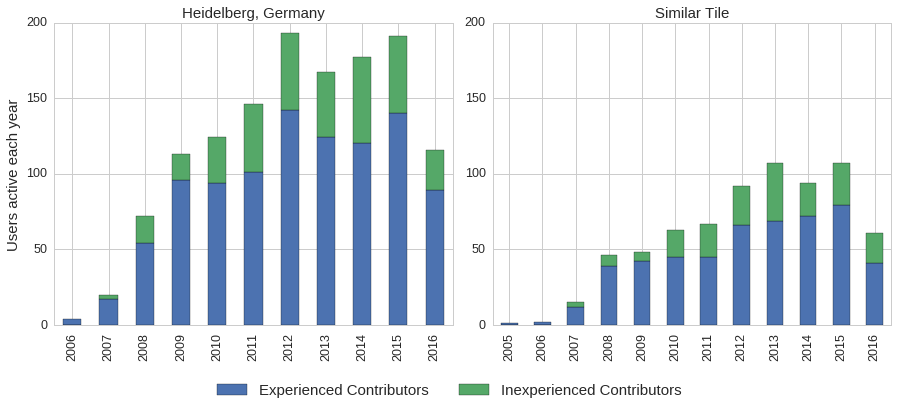

In [38]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6), facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=0.1, hspace=0.5)

#How many days (to date) is considered experienced?
threshold = 7
#Study Tile
gt_10 = overtime_df.query("active_days_to_date>={0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
lt_10 = overtime_df.query("active_days_to_date<{0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
gt_10.columns = ['Experienced Contributors']
lt_10.columns = ['Inexperienced Contributors']
gt_10.join(lt_10).plot(ax=axs[0],kind='bar',stacked=True)

#Compare DF
compare_gt_10 = compare_overtime_df.query("active_days_to_date>={0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
compare_lt_10 = compare_overtime_df.query("active_days_to_date<{0}".format(threshold)).groupby('year').aggregate({'uid':pd.Series.nunique})
compare_gt_10.columns = ['Experienced Contributors']
compare_lt_10.columns = ['Inexperienced Contributors']
compare_gt_10.join(compare_lt_10).plot(ax=axs[1],kind='bar',stacked=True)

axs[0].set_title(study_tiles[study_tile_idx]['name'],fontsize=15)
axs[0].set_ylabel("Users active each year",fontsize=15)
axs[1].set_title("Similar Tile",fontsize=15)

axs[1].set_ylim(axs[0].get_ylim())

for ax in axs:
    ax.legend_.remove()
    ax.set_xlabel("")

handles, labels = axs[1].get_legend_handles_labels()
plt.figlegend(handles, labels, loc='lower center', ncol=2, fontsize=15)

# Percentage of a User's Edits on Each Tile

Study Tile: 26% of contributors have more than 25% of their edits on this tile
Compare Tile: 29% of contributors have more than 25% of their edits on this tile
----
Study Tile: 11% of experienced contributors have more than 10% of their edits on this tile
Compare Tile: 7% of experienced contributors have more than 10% of their edits on this tile


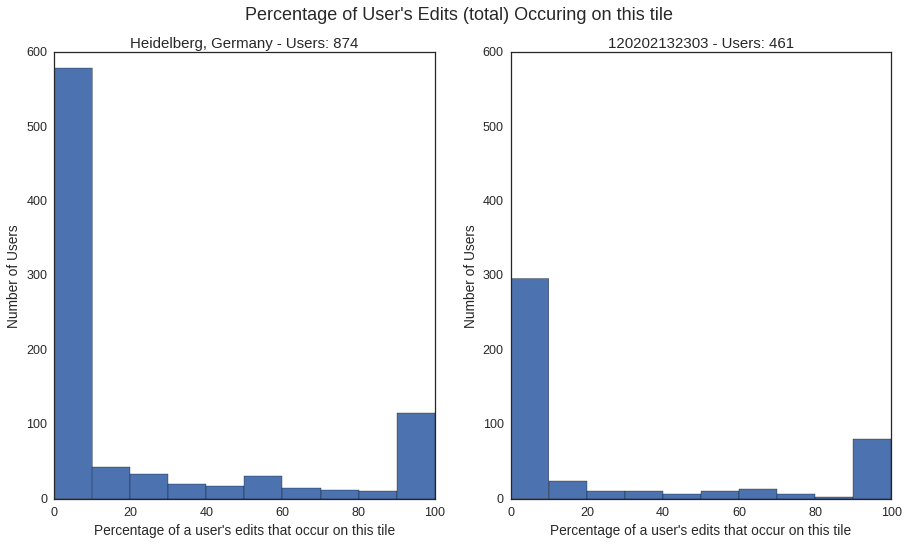

In [40]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

current_tile_df.plot(ax=axs[0], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,10))
axs[0].set_title(study_tiles[study_tile_idx]['name'] + " - Users: "+str(len(current_tile_df)))

compare_tile_df.plot(ax=axs[1], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,10))
axs[1].set_title(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['quad'] + " - Users: "+str(len(compare_tile_df)))

axs[1].set_ylim(axs[0].get_ylim())

for ax in axs:
    ax.set_xlabel("Percentage of a user's edits that occur on this tile")
    ax.set_ylabel('Number of Users')
plt.suptitle("Percentage of User's Edits (total) Occuring on this tile",fontsize=18)

print("Study Tile: {0:.0f}% of contributors have more than 25% of their edits on this tile".format(len(current_tile_df.query('percent_user_edits>25')) / len(current_tile_df)*100))
print("Compare Tile: {0:.0f}% of contributors have more than 25% of their edits on this tile".format(len(compare_tile_df.query('percent_user_edits>25')) / len(compare_tile_df)*100))
print("----")
print("Study Tile: {0:.0f}% of experienced contributors have more than 10% of their edits on this tile".format(len(current_tile_df.query('total_editing_days_ever>7').query('percent_user_edits>10')) / len(current_tile_df.query('total_editing_days_ever>7'))*100))
print("Compare Tile: {0:.0f}% of experienced contributors have more than 10% of their edits on this tile".format(len(compare_tile_df.query('total_editing_days_ever>7').query('percent_user_edits>10')) / len(compare_tile_df.query('total_editing_days_ever>7'))*100))

# Compare Buildings & Roads Across Two _Similar_ Tiles

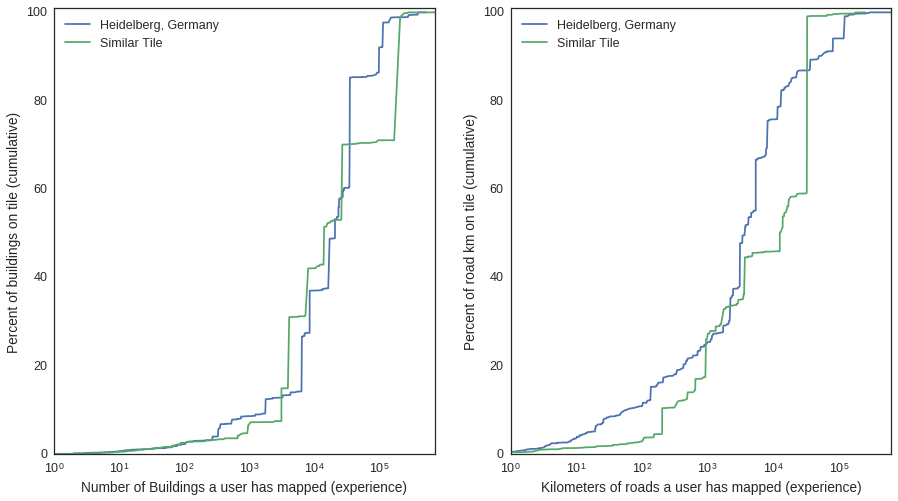

In [41]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

#Buildings
b_axis = axs[0]
b_view = current_tile_df.sort_values(by='total_buildings_ever')
b_view['cumulative_percent'] = b_view.percent_tile_buildings.cumsum()
b_view.plot(ax=b_axis,x='total_buildings_ever',y='cumulative_percent', logx=True,label=study_tiles[study_tile_idx]['name'])

compare_b_view = compare_tile_df.sort_values(by='total_buildings_ever')
compare_b_view['cumulative_percent'] = compare_b_view.percent_tile_buildings.cumsum()
compare_b_view.plot(ax=b_axis,x='total_buildings_ever',y='cumulative_percent', logx=True,label="Similar Tile")

b_axis.set_ylabel('Percent of buildings on tile (cumulative)')
b_axis.set_xlabel('Number of Buildings a user has mapped (experience)')

#Roads
r_axis = axs[1]
r_view = current_tile_df.sort_values(by='total_road_km_ever')
r_view['cumulative_percent'] = r_view.percent_tile_road_km.cumsum()
r_view.plot(ax=r_axis,x='total_road_km_ever',y='cumulative_percent', logx=True,label=study_tiles[study_tile_idx]['name'])

compare_r_view = compare_tile_df.sort_values(by='total_road_km_ever')
compare_r_view['cumulative_percent'] = compare_r_view.percent_tile_road_km.cumsum()
compare_r_view.plot(ax=r_axis,x='total_road_km_ever',y='cumulative_percent', logx=True,label="Similar Tile")

r_axis.set_ylabel('Percent of road km on tile (cumulative)')
r_axis.set_xlabel('Kilometers of roads a user has mapped (experience)')

for ax in [r_axis, b_axis]:
    ax.set_ylim(0,101)
    ax.set_xlim(1)

In [42]:
print("Buildings: ",stats.ks_2samp(b_view.cumulative_percent, compare_b_view.cumulative_percent))
print("Roads: ",stats.ks_2samp(r_view.cumulative_percent, compare_r_view.cumulative_percent))

Buildings:  Ks_2sampResult(statistic=0.11231180847525779, pvalue=0.00088318579678914452)
Roads:  Ks_2sampResult(statistic=0.11491534173545725, pvalue=0.00061475735301091733)


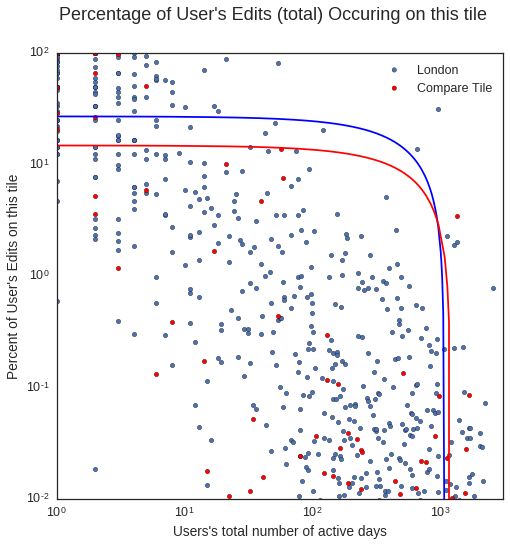

In [40]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,8), facecolor='w', edgecolor='k')

current_tile_df.sort_values(by='total_editing_days_ever').plot(kind='scatter',
    ax=axs,x='total_editing_days_ever',y='percent_user_edits', label=study_tiles[study_tile_idx]['name'])

compare_tile_df.sort_values(by='total_editing_days_ever').plot(kind='scatter', 
    ax=axs,x='total_editing_days_ever',y='percent_user_edits', color='red', label="Compare Tile")

df = pd.DataFrame(current_tile_df.sort_values(by='total_editing_days_ever')[['total_editing_days_ever','percent_user_edits']])
fit = np.polyfit( df.total_editing_days_ever, df.percent_user_edits, deg=1)
axs.plot(df.total_editing_days_ever, fit[0] * df.total_editing_days_ever + fit[1], color='blue')

comparedf = pd.DataFrame(compare_tile_df.sort_values(by='total_editing_days_ever')[['total_editing_days_ever','percent_user_edits']])
compare_fit = np.polyfit( comparedf.total_editing_days_ever, comparedf.percent_user_edits, deg=1)
axs.plot(comparedf.total_editing_days_ever, compare_fit[0] * comparedf.total_editing_days_ever + compare_fit[1], color='red')

axs.set_xscale('log')
axs.set_yscale('log')

axs.set_xlim(1,df.total_editing_days_ever.max())
axs.set_ylim(0.01,100)
axs.set_xlabel("Users's total number of active days")
axs.set_ylabel("Percent of User's Edits on this tile")
plt.suptitle("Percentage of User's Edits (total) Occuring on this tile",fontsize=18)

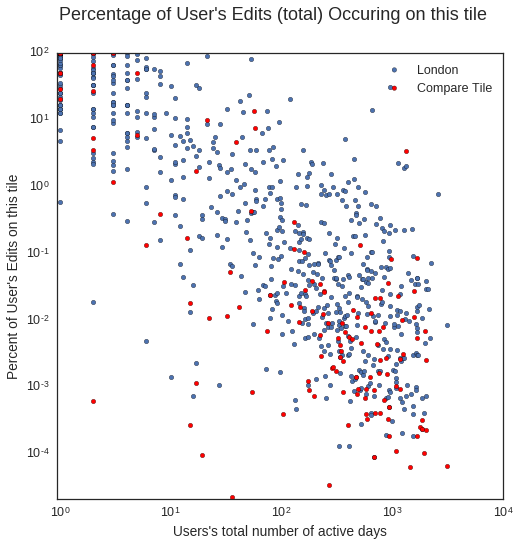

In [42]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,8), facecolor='w', edgecolor='k')

current_tile_df.sort_values(by='total_editing_days_ever').plot(kind='scatter',
    ax=axs,x='total_editing_days_ever',y='percent_user_edits', loglog=True, label=study_tiles[study_tile_idx]['name'])

compare_tile_df.sort_values(by='total_editing_days_ever').plot(kind='scatter', 
    ax=axs,x='total_editing_days_ever',y='percent_user_edits', loglog=True, color='red', label="Compare Tile")

axs.set_xlim(0,10000)
axs.set_ylim(0,100)
axs.set_xlabel("Users's total number of active days")
axs.set_ylabel("Percent of User's Edits on this tile")
plt.suptitle("Percentage of User's Edits (total) Occuring on this tile",fontsize=18)

In [19]:
compare_tile_df

NameError: name 'compare_tile_df' is not defined